Perform K-Means,Hierarchical and DBSCAN Clustering for the airlines data to obtain optimum number of clusters. 
Also Visualise the results.

Data Description:
 
The file EastWest.csv data contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_csv("./EastWest .csv")
df.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
## Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [9]:
# as ID doesn't make any impact on data remove it.
df.drop(['ID#'], axis=1, inplace =True)

In [10]:
# Combine total cc1_miles, cc2_miles, cc3_miles into total_cc_miles 
df['total_cc_miles'] = df['cc1_miles']+df['cc2_miles']+df['cc3_miles']

In [11]:
df.drop(['cc1_miles','cc2_miles', 'cc3_miles'], axis=1, inplace=True)

In [13]:
# Avoid division by zero
df['avg_miles_per_flight'] = df['Flight_miles_12mo'] / df['Flight_trans_12'].replace(0, 1)
df['bonus_ratio'] = df['Bonus_miles'] / df['Balance'].replace(0, 1)
df['enrolled_years'] = df['Days_since_enroll'] / 365

In [16]:
df.drop(['Flight_miles_12mo', 'Flight_trans_12', 'Bonus_miles', 'Balance', 'Days_since_enroll'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Qual_miles            3999 non-null   int64  
 1   Bonus_trans           3999 non-null   int64  
 2   Award?                3999 non-null   int64  
 3   total_cc_miles        3999 non-null   int64  
 4   avg_miles_per_flight  3999 non-null   float64
 5   bonus_ratio           3999 non-null   float64
 6   enrolled_years        3999 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 218.8 KB


### Create the cluster 

In [19]:
from sklearn.cluster import KMeans

# set the number of clusters
k = 5

# create a kmeans class object
kmeans = KMeans(n_clusters=k)

# fit the data to create the cluster
clusters_info = kmeans.fit(df)

### Explore Cluster 

In [21]:
clusters_info.labels_

array([0, 0, 0, ..., 0, 3, 0], shape=(3999,), dtype=int32)

In [27]:
# Get cluster counts
pd.Series(clusters_info.labels_).value_counts()

0    3086
3     762
2     112
1      38
4       1
Name: count, dtype: int64

In [22]:
# Find cluster centroids
clusters_info.cluster_centers_

array([[1.05829553e+01, 1.04630590e+01, 3.08489955e-01, 4.00518471e+00,
        1.92257696e+01, 4.87874563e-01, 1.10581344e+01],
       [6.51042105e+03, 1.26315789e+01, 5.00000000e-01, 4.05263158e+00,
        2.16189505e+02, 2.24707594e-01, 1.13301370e+01],
       [2.37216071e+03, 1.53482143e+01, 6.87500000e-01, 4.17857143e+00,
        2.37881616e+02, 3.58261799e-01, 1.19806018e+01],
       [4.01272966e+01, 1.56246719e+01, 5.68241470e-01, 4.40419948e+00,
        4.65373316e+02, 7.82330568e+00, 1.21019523e+01],
       [0.00000000e+00, 2.00000000e+00, 0.00000000e+00, 3.00000000e+00,
        9.57700000e+03, 1.38089954e-01, 4.15068493e+00]])

In [23]:
# find the number of clusters
len(clusters_info.cluster_centers_)

5

In [24]:
# find the number of iterations needed to find the final clusters
clusters_info.n_iter_

6

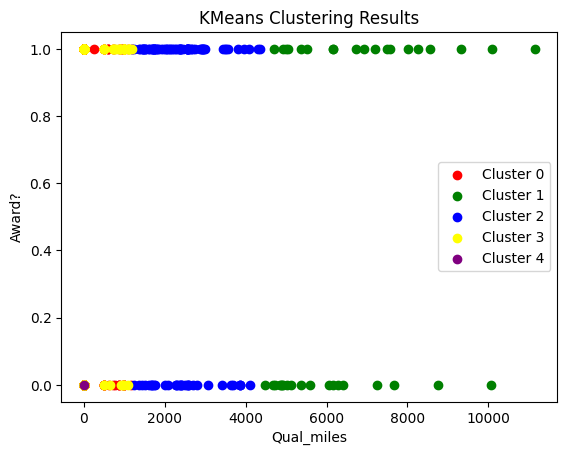

In [30]:
# Add cluster labels as a new column in the DataFrame
df['Cluster'] = clusters_info.labels_

# Now, you can plot
plt.scatter(df['Qual_miles'][df['Cluster'] == 0], df['Award?'][df['Cluster'] == 0], color='red', label='Cluster 0')
plt.scatter(df['Qual_miles'][df['Cluster'] == 1], df['Award?'][df['Cluster'] == 1], color='green', label='Cluster 1')
plt.scatter(df['Qual_miles'][df['Cluster'] == 2], df['Award?'][df['Cluster'] == 2], color='blue', label='Cluster 2')
plt.scatter(df['Qual_miles'][df['Cluster'] == 3], df['Award?'][df['Cluster'] == 3], color='yellow', label='Cluster 3')
plt.scatter(df['Qual_miles'][df['Cluster'] == 4], df['Award?'][df['Cluster'] == 4], color='purple', label='Cluster 4')

# Customize the plot
plt.xlabel("Qual_miles")
plt.ylabel("Award?")
plt.title("KMeans Clustering Results")
plt.legend()
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering

# create an object of AgglomerativeClustering
cluster_info = AgglomerativeClustering(n_clusters=5)

# build the clusters
cluster_info = cluster_info.fit(df)

In [32]:
cluster_info.n_clusters

5

In [33]:
cluster_info.labels_

array([3, 3, 3, ..., 3, 0, 3], shape=(3999,))

In [37]:
pd.Series(clusters_info.labels_).value_counts()

0    3086
3     762
2     112
1      38
4       1
Name: count, dtype: int64

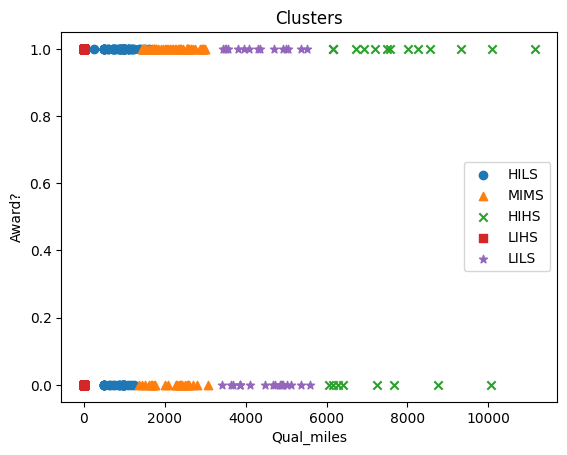

In [38]:
markers = ['o', '^', 'x', 's', '*']
labels = [
    "HILS", "MIMS", "HIHS", "LIHS", "LILS"
]
for cluster in range(5):
    plt.scatter(
        df['Qual_miles'][cluster_info.labels_ == cluster],
        df['Award?'][cluster_info.labels_ == cluster],
        marker=markers[cluster],
        label=labels[cluster]
    )
plt.xlabel('Qual_miles')
plt.ylabel('Award?')
plt.title("Clusters")
plt.legend()

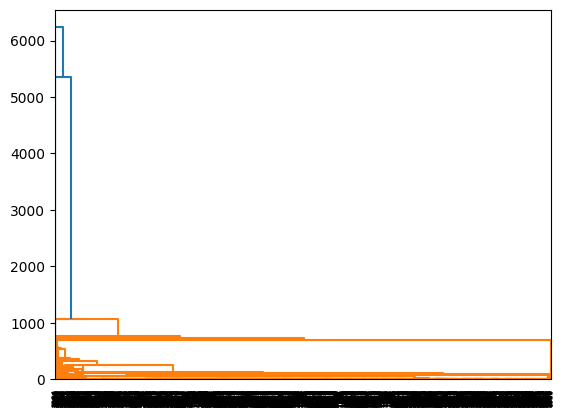

In [39]:
from scipy.cluster import hierarchy

# get the linkage information
linkage = hierarchy.linkage(df, 'single')

# create a dendrogram using linkage data
dendrogram = hierarchy.dendrogram(linkage)

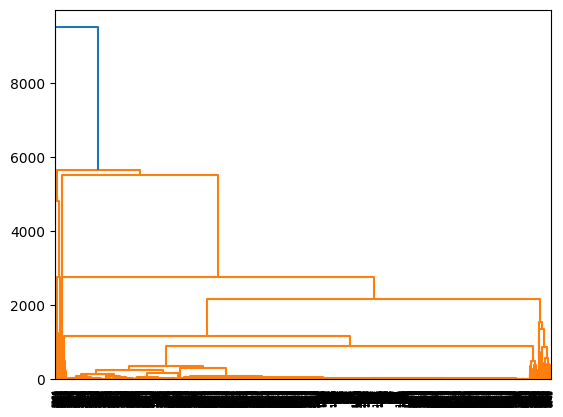

In [40]:
from scipy.cluster import hierarchy

# get the linkage information
linkage = hierarchy.linkage(df, 'average')

# create a dendrogram using linkage data
dendrogram = hierarchy.dendrogram(linkage)

In [41]:
from sklearn.cluster import DBSCAN

# create an object of DBScan
dbscan = DBSCAN(eps=0.15, min_samples=5)

# fit the data
dbscan = dbscan.fit(df)